In [1]:
# using Pkg
# Pkg.activate(".")

Single Particle Spin $\tfrac{1}{2}$ system: Adiabatic Hamiltonian
====================================

Want to be able to represent a spin $\tfrac{1}{2}$ system so we can test the time evolution of different pulses. Our Hamiltonian can be controlled by a laser. A laser can be controlled by the intensity, frequency, and phase. While not exactly the same, these can be mapped to three parameters in our Hamiltonian:
$$
\text{intensity} \mapsto \Omega(t) \\
\text{frequency} \mapsto \Delta(t) \\
\text{phase} \mapsto \phi(t) 
$$
which appear in the Hamiltonian as follows:
$$
\hat{H} = \frac{-\Delta(t)}{2}\hat{1} 
    - \frac{-\Delta(t)}{2}\hat{\sigma}_z 
    + \frac{\Omega(t)}{2}
        (
            \cos{\phi(t)}\hat{\sigma}_x +
            \sin{\phi(t)}\hat{\sigma}_y
        )
    = \frac{-\Delta(t)}{2}\hat{1} + \frac{1}{2}\tilde{\vec{\Omega}}(t) \cdot \hat{\vec{\sigma}}
$$
for now we will take $\phi$ to be zero.

In [2]:
using QuantumOptics
using LinearAlgebra


computational = SpinBasis(1//2)

I = identityoperator(computational)
σx = sigmax(computational)
σy = sigmay(computational)
σz = sigmaz(computational)
σ_vec = [σx, σy, σz]

function linear(T, h)
    Ω_eff_mag(t) = 1.0
    # T = 100
    # h = pi/2
    b = π
    m = 2*h/T
    # θ(t) = t < T/2 ? m*t+b : -m*(t-T)+b # linear down then up
    θ(t) = -(m^2/h)*t^2+2*m*t+b  # quadratic

    Δ(t) = cos(θ(t))*Ω_eff_mag(t)
    Ω(t) = -tan(θ(t))*Δ(t)
    Ω_vec(t) = [Ω(t), 0.0, -Δ(t)]


    H(t, ignored) = Ω(t)*σx/2 - Δ(t)*I/2 - Δ(t)*σz/2 

    tspan = [0.0:0.01:T;] 
    tout, psi_t = timeevolution.schroedinger_dynamic(tspan, spindown(computational), H)
    return tout, psi_t, H
end


linear (generic function with 1 method)

Vector{Ket{SpinBasis{1//2, Int64}, Vector{ComplexF64}}}
Ket(dim=2)
  basis: Spin(1/2)
 0.0 + 0.0im
 1.0 + 0.0im
---->
Ket(dim=2)
  basis: Spin(1/2)
  0.0011940521086733 - 0.00293267569541501im
 -0.5979095197882905 + 0.8015355938070922im
[[1.2246467991473532e-16, 0.0, -1.0], [-2.094363660209901e-9, 6.283049165829579e-7, -0.9999999999998026], [-1.674792580690247e-8, 2.5131228931065153e-6, -0.999999999996842], [-5.652341814814929e-8, 5.6542148295876455e-6, -0.9999999999840133], [-1.3399185023146164e-7, 1.0051216821775795e-5, -0.9999999999494775], [-2.617148242043783e-7, 1.5703639333793733e-5, -0.9999999998766637], [-4.522443983822938e-7, 2.261086718902377e-5, -0.9999999997442721], [-7.181230872396231e-7, 3.077215957008529e-5, -0.9999999995262793], [-1.0718838614545853e-6, 4.018665002076727e-5, -0.9999999991919422], [-1.5260501478265462e-6, 5.0853346442364565e-5, -0.9999999987058041], [-2.093135829364669e-6, 6.277113109729353e-5, -0.9999999980277019], [-2.785645245229365e-6, 7.593876060666

Excessive output truncated after 524292 bytes.

 -0.6782879533675763], [-0.7346476747813293, 0.020591343895298497, -0.6781362624834125], [-0.7347868895640308, 0.020628667612676187, -0.6779842807892692], [-0.7349263383222726, 0.020664792418426822, -0.6778320172391681], [-0.7350660127374622, 0.02069971469191933, -0.6776794808240266], [-0.7352059058358551, 0.02073343116333804, -0.6775266790734332], [-0.7353460103321621, 0.020765938516485494, -0.6773736198628504], [-0.7354863178390145, 0.020797233328106627, -0.677220312274746], [-0.7356268199609795, 0.020827312302342846, -0.6770667654052719], [-0.7357675082950584, 0.020856172270807834, -0.6769129883637124], [-0.7359083744311841, 0.020883810192663155, -0.676758990271935], [-0.7360494099527134, 0.020910223154688042, -0.6766047802638432], [-0.7361906064369292, 0.02093540837134452, -0.6764503674848225], [-0.7363319554555335, 0.020959363184844235, -0.676295761091193], [-0.7364734485751457, 0.02098208506520585, -0.6761409702496578], [-0.7366150773578028, 0.021003571610315852, -0.6759860041367

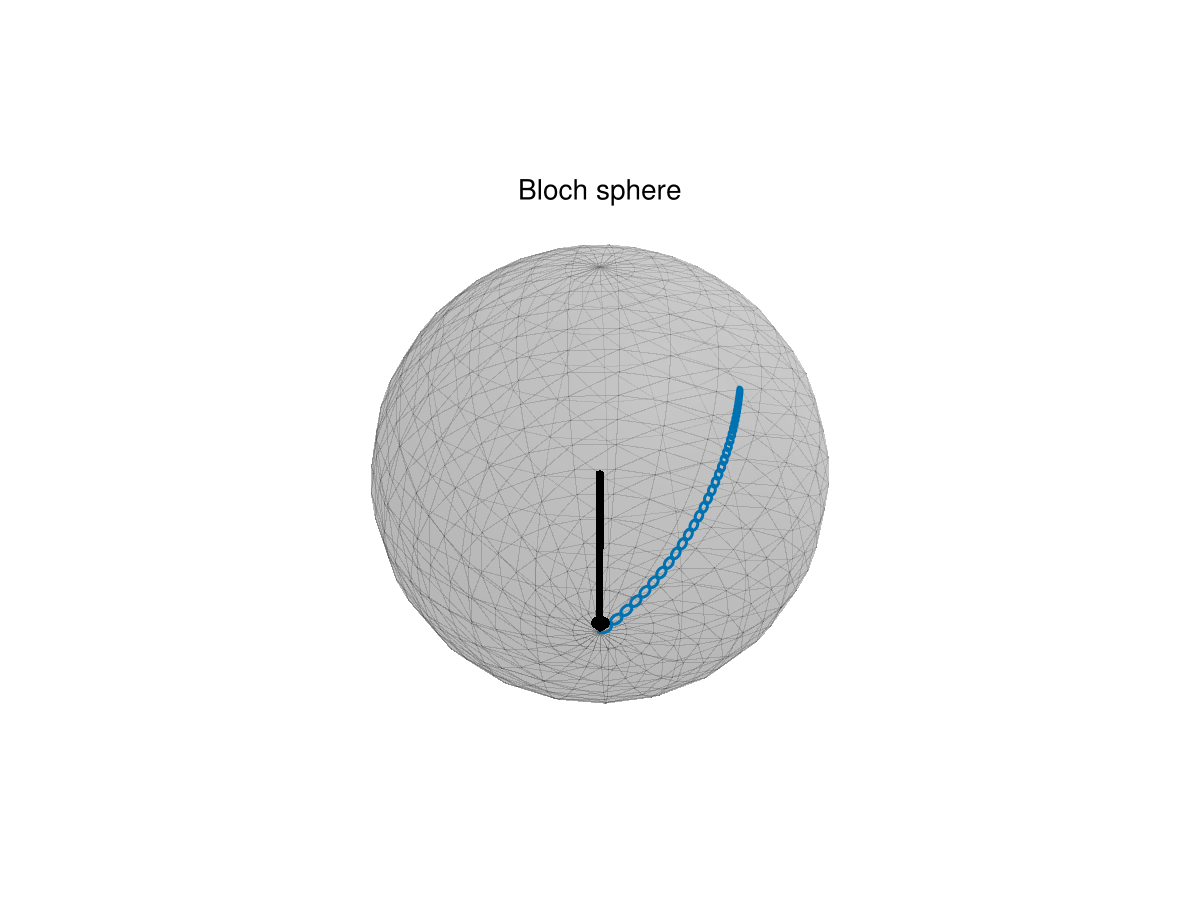

CairoMakie.Screen{IMAGE}


In [13]:
include("./Plotting.jl")
include("./Utils.jl")
using CairoMakie

tout, psi_t = linear(500, pi/2)
psi_t[end]
println(typeof(psi_t))
println(psi_t[1],"\n---->\n", psi_t[end])
println((statevectorToBlochvector.(psi_t)))
fig = Figure()
bloch = bloch_plot!(fig[1,1], tout, psi_t)
text!(bloch, 0, 0, 1.25, text="Bloch sphere", align=(0.5,0))
display(fig)


Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


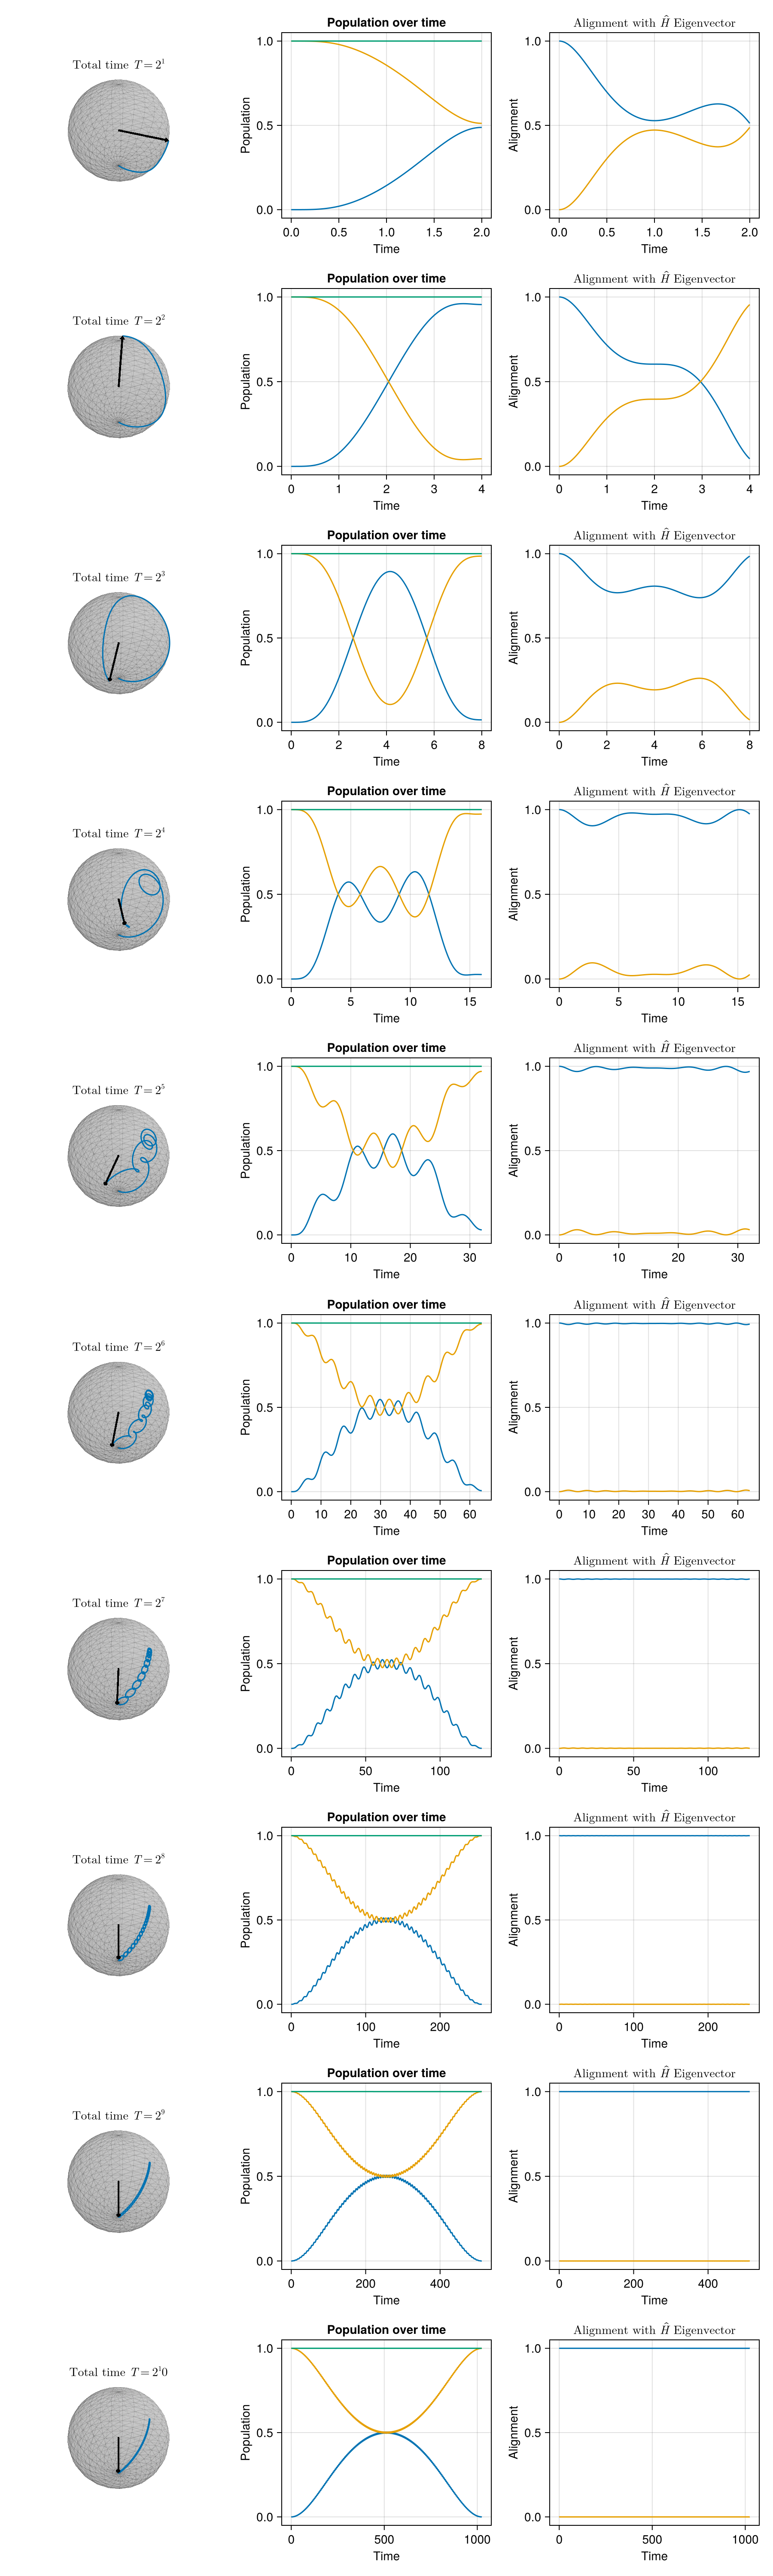

CairoMakie.Screen{IMAGE}


In [ ]:
include("./Plotting.jl")
include("./Utils.jl")
using CairoMakie

fig = Figure(size = (900, 3000))
for (i,T) in enumerate(2 .^ (1:10))
    tout, psi_t, H = linear(T, π/2)
    
    bloch = bloch_plot!(fig[i, 1], tout, psi_t)
    text!(bloch, 0, 0, 1.25, text=L"Total time $T=2^{%$(i)}$", align=(0.5,0))
    pop_ax = population_plot!(fig[i, 2], tout, psi_t)
    alignment_plot!(fig[i, 3], tout, psi_t, (t -> H(t, nothing)))
    println("Iteration $i")
end
display(fig)